In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [4]:
path='../datasets/ndviavhrr19812001.nc'
ncfile=xr.open_dataset(path)
print(ncfile)

<xarray.Dataset> Size: 65MB
Dimensions:  (lat: 180, lon: 360, time: 252)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2kB 1981-01-01 1981-02-01 ... 2001-12-01
Data variables:
    data     (time, lat, lon) float32 65MB ...
Attributes:
    history:     \nNational Aeronautics and Space Administration advanced ver...
    title:       NASA AVHRR normalized difference vegetation index, 1981-2001
    convention:  The file is written in COARDS-compliant netCDF:\nftp://ftp.u...


In [ ]:
ndvi=ncfile.data_vars['data']
print(ndvi.shape)

In [6]:
ndvi_=ndvi.assign_coords({"lon":(((ndvi.lon+180)%360)-180)})
print(ndvi_)

<xarray.DataArray 'data' (time: 252, lat: 180, lon: 360)> Size: 65MB
[16329600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * time     (time) datetime64[ns] 2kB 1981-01-01 1981-02-01 ... 2001-12-01
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... -4.5 -3.5 -2.5 -1.5 -0.5
Attributes:
    units:      non-dimensional
    long_name:  NASA AVHRR normalized difference vegetation index, 1981-2001


In [8]:
ndvi_=ndvi_.sortby('lon')
print(ndvi_)

<xarray.DataArray 'data' (time: 252, lat: 180, lon: 360)> Size: 65MB
[16329600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * time     (time) datetime64[ns] 2kB 1981-01-01 1981-02-01 ... 2001-12-01
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    units:      non-dimensional
    long_name:  NASA AVHRR normalized difference vegetation index, 1981-2001


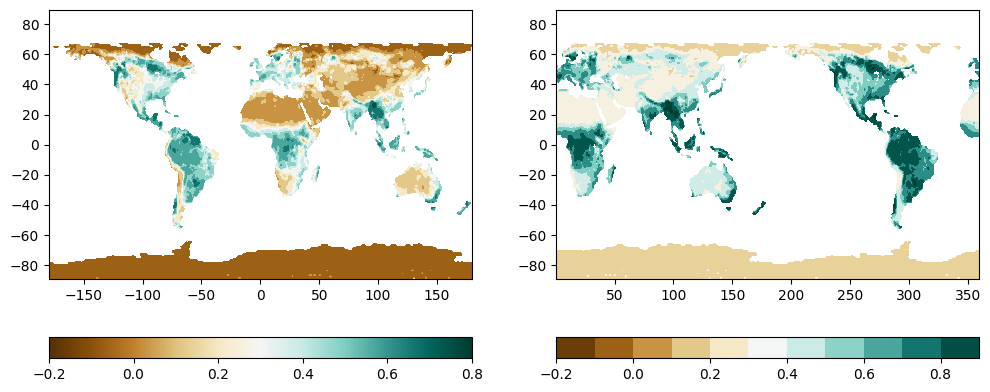

In [9]:
fig, ax=plt.subplots(1,2, figsize=(12,5))
ndvi_lat_convert=ax[0].contourf(ndvi_.lon, ndvi_.lat, ndvi_[10], cmap=plt.cm.BrBG, levels=10)
cmap=mpl.cm.BrBG
norm=mpl.colors.Normalize(vmin=-0.2, vmax=0.8)
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[0], orientation='horizontal')

ndvi_lat_original=ax[1].contourf(ndvi.lon, ndvi.lat, ndvi[10], cmap=plt.cm.BrBG)
ndvi_lat_original.set_clim(-0.5, 0.75)
cbar2=fig.colorbar(ndvi_lat_convert, ax=ax[1], location='bottom')

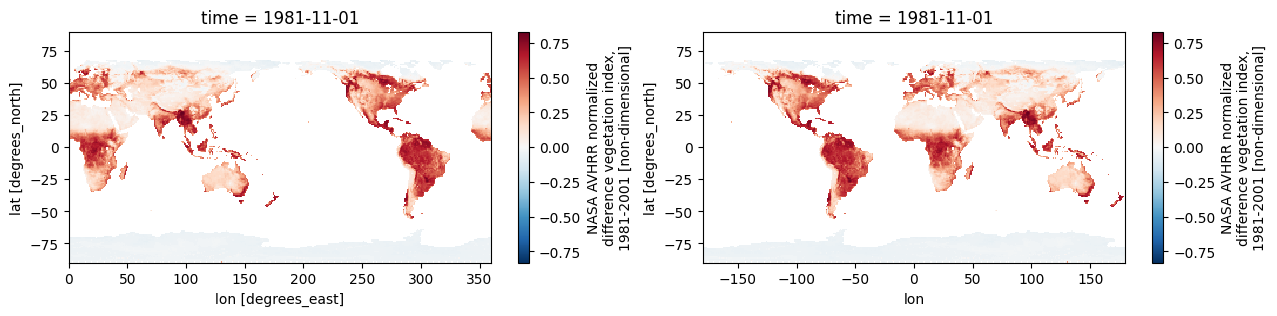

In [10]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1); ndvi[10].plot()
plt.subplot(1,2,2); ndvi_[10].plot()

In [11]:
africa=ndvi_.sel(lon=slice(-30, 60), lat=slice(40, -40))
print(africa.shape)
africa

(252, 80, 90)


<xarray.DataArray 'data' (time: 252, lat: 80, lon: 90)> Size: 7MB
[1814400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 320B 39.5 38.5 37.5 36.5 ... -36.5 -37.5 -38.5 -39.5
  * time     (time) datetime64[ns] 2kB 1981-01-01 1981-02-01 ... 2001-12-01
  * lon      (lon) float32 360B -29.5 -28.5 -27.5 -26.5 ... 56.5 57.5 58.5 59.5
Attributes:
    units:      non-dimensional
    long_name:  NASA AVHRR normalized difference vegetation index, 1981-2001

In [12]:
africa_clim=africa.groupby('time.month').mean('time')
print(africa_clim.shape)

(12, 80, 90)


In [13]:
africa_anom=africa_clim-africa_clim.mean('month')
print(africa_anom.shape)
print(africa_clim)

(12, 80, 90)
<xarray.DataArray 'data' (month: 12, lat: 80, lon: 90)> Size: 346kB
array([[[       nan,        nan,        nan, ..., 0.0447    ,
         0.04939999, 0.059     ],
        [       nan,        nan,        nan, ..., 0.04665   ,
         0.0399    , 0.03795   ],
        [       nan,        nan,        nan, ..., 0.0489    ,
         0.0626    , 0.11179999],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., 0.04715   ,
         0.05190001, 0.06459999],
        [       nan,        nan,        nan, ..., 0.06070001,
         0.0464    , 0.0399    ],
        [       nan,        nan,        nan, ..., 0.0445    ,
         0.06115   , 0.1306    ],
...
        [       nan,        nan,    

In [15]:
lat=[x for x in np.arange(39.4, -40.5, -1)]
lon=[y for y in np.arange(-29.5, 60.5, 1)]
month=[t for t in np.arange(1,12+1,1)]

data=africa_clim.copy()

africa_progression=xr.DataArray(data, dims=["month", "lat", "lon"], coords=dict(month=("month", month),
                                lon=("lon", lon), lat=("lat", lat)), attrs=dict(description="NASA AVHRR normalized difference",
                                                                                units="non-dimensional"))
print(africa_progression[1])


<xarray.DataArray 'data' (lat: 80, lon: 90)> Size: 29kB
array([[       nan,        nan,        nan, ..., 0.04715   , 0.05190001,
        0.06459999],
       [       nan,        nan,        nan, ..., 0.06070001, 0.0464    ,
        0.0399    ],
       [       nan,        nan,        nan, ..., 0.0445    , 0.06115   ,
        0.1306    ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    month    int64 8B 2
  * lon      (lon) float64 720B -29.5 -28.5 -27.5 -26.5 ... 56.5 57.5 58.5 59.5
  * lat      (lat) float64 640B 39.4 38.4 37.4 36.4 ... -36.6 -37.6 -38.6 -39.6
Attributes:
    description:  NASA AVHRR normalized difference
    units:        non-dimensional


In [16]:
for t in range(0,12):
    if t==0:
        africa_progression[t]=(africa_progression[t]-africa_progression[-1])*10
    else:
        africa_progression[t]=(africa_progression[t]-africa_progression[t-1])*10

print(africa_progression[1])

<xarray.DataArray 'data' (lat: 80, lon: 90)> Size: 29kB
array([[        nan,         nan,         nan, ..., -0.04060563,
        -0.34205198,  0.04599981],
       [        nan,         nan,         nan, ...,  0.69463265,
        -0.44705313, -0.78021026],
       [        nan,         nan,         nan, ...,  2.9602647 ,
         2.5988693 , -0.53189206],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    month    int64 8B 2
  * lon      (lon) float64 720B -29.5 -28.5 -27.5 -26.5 ... 56.5 57.5 58.5 59.5
  * lat      (lat) float64 640B 39.4 38.4 37.4 36.4 ... -36.6 -37.6 -38.6 -39.6
Attributes:
    description:  NASA AVHRR normalized difference
    units:        non-dimensional


In [17]:
def plot_africa_NDVI(clim_ano_prog, row, col, month):
    projection_type=ccrs.PlateCarree(central_longitude=0)
    plot_=plt.subplot(spec[row, col], projection=projection_type)
    plot_.set_extent([-30, 60, -40, 40])

    index=month-1
    lon2d, lat2d=np.meshgrid(clim_ano_prog.lon, clim_ano_prog.lat)

    plot_.coastlines(linewidth=0.5, color='k')
    plot_.add_feature(cfeature.BORDERS, linewidth=0.5, color='k')
    gl=plot_.gridlines(linewidth=0, draw_labels=True)
    gl.xlabels_top=False; gl.ylabels_right=False
    gl.xlabel_style={'size':8}
    gl.ylabel_style={'size':8}

    ndvi_contourf=plot_.contourf(lon2d, lat2d, clim_ano_prog[index], cmap=plt.cm.BrBG, levels=20)
    plot_.set_title(month)
    return ndvi_contourf

AttributeError: 'function' object has no attribute 'title'

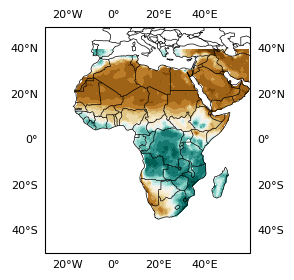

In [18]:
fig=plt.figure(figsize=(15, 10))
spec=gridspec.GridSpec(3,4)

mo=1
for row in range(3):
    for col in range(4):
        plot = plot_africa_NDVI(africa_clim, row, col, mo)
        mo+=1

cbar_ax=fig.add_axes([0.16, 0.05, 0.685, 0.025])
cmap=mpl.cm.BrBG
norm=mpl.colors.Normalize(vmin=0, vmax=0.64)
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')